# 6.1

# 문제 정의

기수정렬

# 알고리즘 설명

공간을 희생하여 시간 효율을 높이는 방법
숫자가 10진수라면 0~9까지의 버킷 즉, 메모리 공간을 만들고 숫자들을 버킷에 맞게 담았다가 꺼낼 땐 정렬되어 나오는 구조

하지만 이렇게 숫자가 단순하다면 쉽겠지만
예를 들어, 복잡한 숫자가 된다면(0~99라든지 A,B라는 16진수라면) 메모리를 더 써야한다.
알고리즘은 비슷하지만, 10의 자리의 수와 일의 자리의 수의 메모리 공간을 더 만들어서 사용해야 한다.
이도 10자리의 수를 먼저 하는 것이 아니라 1의 자리의 수를 먼저 분배를 하고 10의 자리의 수를 분배를 해야 데이터가 정확하다.

# 코드 개요

버킷은 큐를 사용해야 한다.
그 이유는 여러 개의 숫자가 들어있다면 먼저 들어간 숫자가 먼저 나와야 한다. 
이 말은 즉슨, [28,26,39,38]이 있다고 치면,
1의 자리를 먼저 분배를 하게 되면 [26,28,38,39]가 되고, 10자리를 그 후 분배를 하게 되면 [26,28,38,39]가 된다.
여기서, 10의 자리 26,28이 한 버킷에 저장이 되고 거기서 먼저 들어간 26이 먼저 나와야 하는 구조여야 정렬이 되기에, 
큐를 사용해야 한다.

정렬되지 않는 리스트를 입력변수로 받고 1의 자리부터 10의 자리까지 큰 자리로 올라가면서 정렬한다.
모든 버킷에서 숫자를 순서대로 꺼내 원래의 리스트를 저장하는 부분이 출력 변수로 나오게 된다.

# 손으로 푼 예제

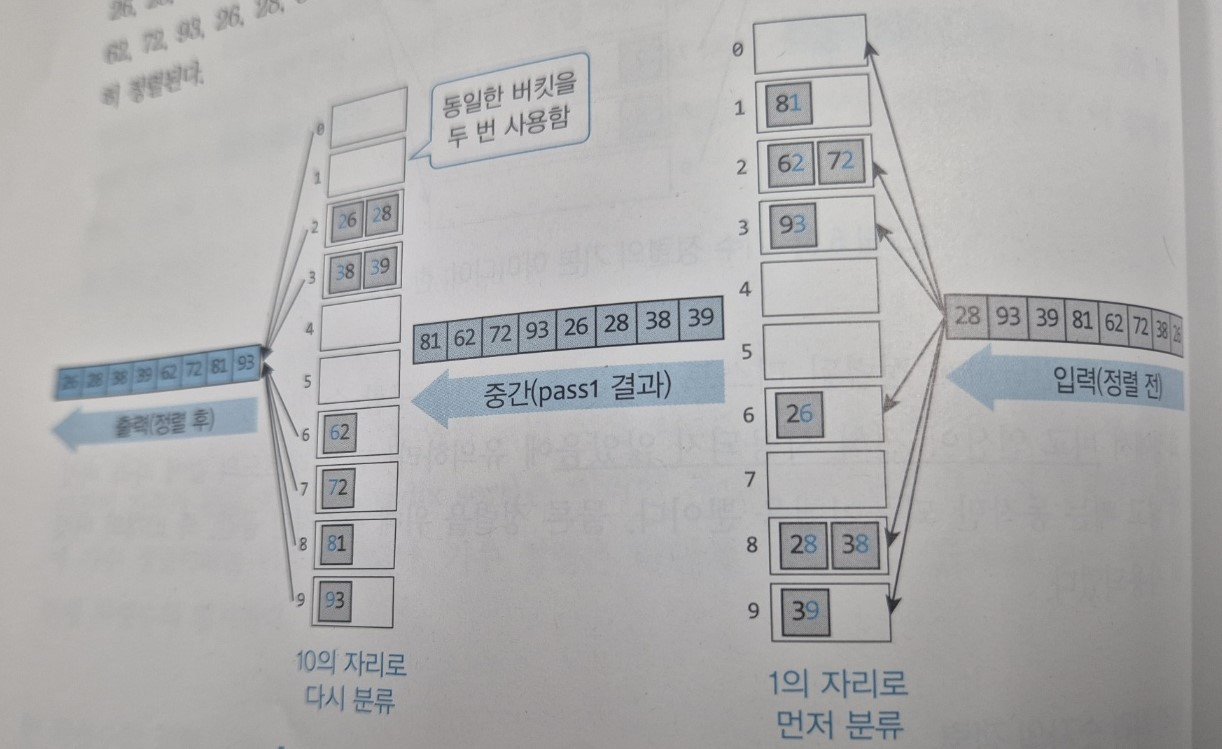

# 알고리즘 코드

In [1]:
def radix_sort(A):
    queues = []
    for i in range(BUCKETS):
        queues.append(Queue())

    n = len(A)
    factor = 1
    for d in range(DIGITS):
        for i in range(n):
            queues[(A[i] // factor) % BUCKETS].put(A[i])
        j = 0
        for b in range(BUCKETS):
            while not queues[b].empty():
                A[j] = queues[b].get()
                j += 1
        factor *= BUCKETS
        print("step", d + 1, A)



Initial Data: [5901, 4079, 907, 2836, 2295, 1827, 7827, 3410, 7536, 7052]
step 1 [3410, 5901, 7052, 2295, 2836, 7536, 907, 1827, 7827, 4079]
step 2 [5901, 907, 3410, 1827, 7827, 2836, 7536, 7052, 4079, 2295]
step 3 [7052, 4079, 2295, 3410, 7536, 1827, 7827, 2836, 5901, 907]
step 4 [907, 1827, 2295, 2836, 3410, 4079, 5901, 7052, 7536, 7827]
Radix Sorted Data: [907, 1827, 2295, 2836, 3410, 4079, 5901, 7052, 7536, 7827]


# 테스트 코드

In [2]:
from queue import Queue

def radix_sort(A):
    queues = []
    for i in range(BUCKETS):
        queues.append(Queue())

    n = len(A)
    factor = 1
    for d in range(DIGITS):
        for i in range(n):
            queues[(A[i] // factor) % BUCKETS].put(A[i])
        j = 0
        for b in range(BUCKETS):
            while not queues[b].empty():
                A[j] = queues[b].get()
                j += 1
        factor *= BUCKETS
        print("step", d + 1, A)
        
import random

BUCKETS = 10
DIGITS = 4
data = []
for i in range(10):
    data.append(random.randint(1, 9999))

print("Initial Data:", data)
radix_sort(data)
print("Radix Sorted Data:", data)

Initial Data: [6107, 6654, 4004, 4302, 1578, 8092, 7298, 325, 4868, 4385]
step 1 [4302, 8092, 6654, 4004, 325, 4385, 6107, 1578, 7298, 4868]
step 2 [4302, 4004, 6107, 325, 6654, 4868, 1578, 4385, 8092, 7298]
step 3 [4004, 8092, 6107, 7298, 4302, 325, 4385, 1578, 6654, 4868]
step 4 [325, 1578, 4004, 4302, 4385, 4868, 6107, 6654, 7298, 8092]
Radix Sorted Data: [325, 1578, 4004, 4302, 4385, 4868, 6107, 6654, 7298, 8092]


# 복잡도 분석


알고리즘의  
//

for d in range(DIGITS):

        for i in range(n):
            queues[(A[i] // factor) % BUCKETS].put(A[i])
        j = 0 이 부분은 d번 이상 즉, 자릿수 만큼 반복되고,


        //
    for b in range(BUCKETS):
            while not queues[b].empty():
                A[j] = queues[b].get()
                j += 1
        factor *= BUCKETS
        print("step", d + 1, A)
이 부분은 n번 수행하기 때문에 O(d*n)이다 하지만 d는 자릿 수이므로 상수로 간주되어 O(n)이 시간 복잡도가 되는 것이다 